# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # pause for 1 second using time.sleep()
        time.sleep(1)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | xingcheng
Processing Record 5 of Set 1 | khandud
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | nova sintra
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | menaka
Processing Record 11 of Set 1 | pangody
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | firestone
Processing Record 15 of Set 1 | tulagi
Processing Record 16 of Set 1 | tazovsky
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | iskateley
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | singkil
Processing Record 22 of Set 1 | port saint john's
Processing Re

Processing Record 41 of Set 4 | franklin
Processing Record 42 of Set 4 | luanda
Processing Record 43 of Set 4 | baruun-urt
Processing Record 44 of Set 4 | puntarenas
Processing Record 45 of Set 4 | chonchi
Processing Record 46 of Set 4 | fale old settlement
Processing Record 47 of Set 4 | greymouth
Processing Record 48 of Set 4 | klichaw
Processing Record 49 of Set 4 | steinbach
Processing Record 0 of Set 5 | miyoshi
Processing Record 1 of Set 5 | midvagur
Processing Record 2 of Set 5 | new norfolk
Processing Record 3 of Set 5 | kununurra
Processing Record 4 of Set 5 | santa elena de uairen
Processing Record 5 of Set 5 | afaahiti
Processing Record 6 of Set 5 | limon
Processing Record 7 of Set 5 | keflavik
Processing Record 8 of Set 5 | avarua
Processing Record 9 of Set 5 | eydhafushi
Processing Record 10 of Set 5 | kawerau
Processing Record 11 of Set 5 | punta del este
Processing Record 12 of Set 5 | tweed heads
Processing Record 13 of Set 5 | namibe
Processing Record 14 of Set 5 | mou

Processing Record 30 of Set 8 | bani walid
Processing Record 31 of Set 8 | manta
Processing Record 32 of Set 8 | tucumcari
Processing Record 33 of Set 8 | manokwari
Processing Record 34 of Set 8 | yulinshi
Processing Record 35 of Set 8 | pointe-du-lac
Processing Record 36 of Set 8 | azna
Processing Record 37 of Set 8 | visby
Processing Record 38 of Set 8 | singarayakonda
Processing Record 39 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 40 of Set 8 | mossel bay
Processing Record 41 of Set 8 | naze
Processing Record 42 of Set 8 | selfoss
Processing Record 43 of Set 8 | kavaratti
Processing Record 44 of Set 8 | jiuquan
Processing Record 45 of Set 8 | kolondieba
Processing Record 46 of Set 8 | constitucion
Processing Record 47 of Set 8 | montfort-sur-meu
Processing Record 48 of Set 8 | puerto baquerizo moreno
Processing Record 49 of Set 8 | sarankhola
Processing Record 0 of Set 9 | tralee
Processing Record 1 of Set 9 | salyan
Processing Record 2 of Set 9 | trairi
Pro

Processing Record 20 of Set 12 | friesoythe
Processing Record 21 of Set 12 | tarakan
Processing Record 22 of Set 12 | lexington
Processing Record 23 of Set 12 | buka
Processing Record 24 of Set 12 | ghadamis
Processing Record 25 of Set 12 | klaksvik
Processing Record 26 of Set 12 | cockburn town
Processing Record 27 of Set 12 | aljezur
Processing Record 28 of Set 12 | hit
Processing Record 29 of Set 12 | nakama
Processing Record 30 of Set 12 | island harbour
Processing Record 31 of Set 12 | zheshart
Processing Record 32 of Set 12 | burang
Processing Record 33 of Set 12 | taoudenni
Processing Record 34 of Set 12 | faya-largeau
Processing Record 35 of Set 12 | vrangel'
Processing Record 36 of Set 12 | salalah
Processing Record 37 of Set 12 | sur
Processing Record 38 of Set 12 | kalisz
Processing Record 39 of Set 12 | turkmenbasy
Processing Record 40 of Set 12 | byram
Processing Record 41 of Set 12 | suva
Processing Record 42 of Set 12 | beyneu
Processing Record 43 of Set 12 | sanctuary p

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,47.52,67,48,1.01,AU,1725819739
1,hilo,19.7297,-155.0900,79.11,83,20,4.61,US,1725819740
2,papatowai,-46.5619,169.4708,43.93,82,80,6.17,NZ,1725819742
3,xingcheng,40.6167,120.7167,72.63,85,63,9.93,CN,1725819743
4,khandud,36.9513,72.3180,57.79,36,6,7.40,AF,1725819744


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,47.52,67,48,1.01,AU,1725819739
1,hilo,19.7297,-155.0900,79.11,83,20,4.61,US,1725819740
2,papatowai,-46.5619,169.4708,43.93,82,80,6.17,NZ,1725819742
3,xingcheng,40.6167,120.7167,72.63,85,63,9.93,CN,1725819743
4,khandud,36.9513,72.3180,57.79,36,6,7.40,AF,1725819744


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

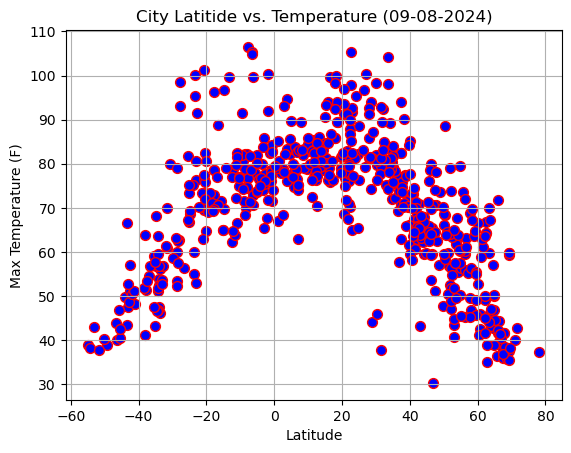

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    color="blue",
    edgecolor="red",
    linewidth=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitide vs. Temperature (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

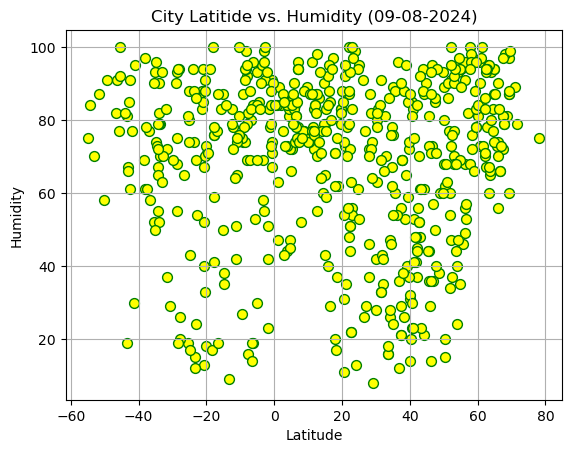

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color="yellow",
    edgecolor="green",
    linewidth=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitide vs. Humidity (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

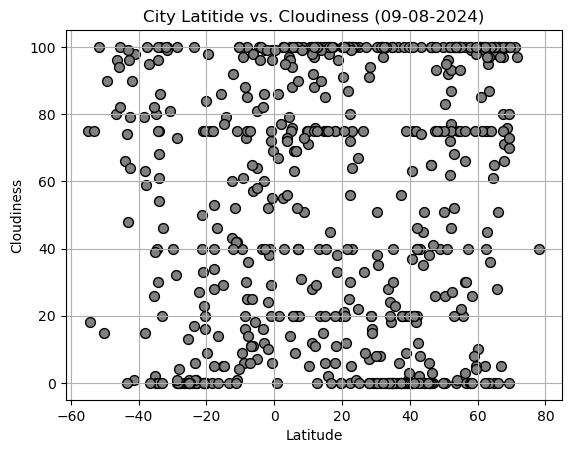

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color="grey",
    edgecolor="black",
    linewidth=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitide vs. Cloudiness (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

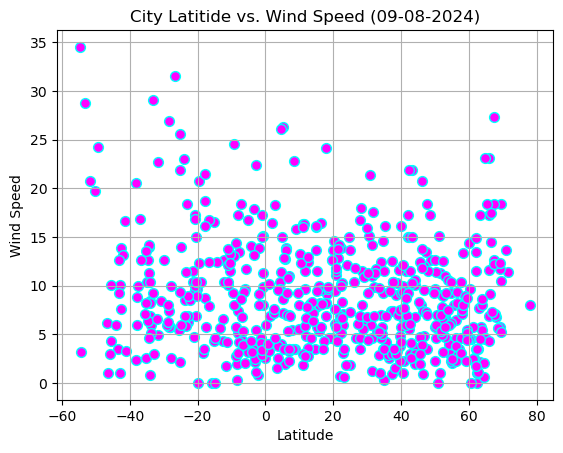

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    color="magenta",
    edgecolor="cyan",
    linewidth=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitide vs. Wind Speed (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, color):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values, y_values, color=color, edgecolor="black", s=50)
    plt.plot(x_values,regress_values, "r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hilo,19.7297,-155.0900,79.11,83,20,4.61,US,1725819740
3,xingcheng,40.6167,120.7167,72.63,85,63,9.93,CN,1725819743
4,khandud,36.9513,72.3180,57.79,36,6,7.40,AF,1725819744
5,thompson,55.7435,-97.8558,73.56,46,20,8.05,CA,1725819745
6,nova sintra,14.8667,-24.7167,80.19,79,85,16.02,CV,1725819746


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,47.52,67,48,1.01,AU,1725819739
2,papatowai,-46.5619,169.4708,43.93,82,80,6.17,NZ,1725819742
7,ushuaia,-54.8000,-68.3000,38.86,75,75,34.52,AR,1725819704
11,port-aux-francais,-49.3500,70.2167,38.82,91,90,24.27,TF,1725819752
12,hithadhoo,-0.6000,73.0833,82.98,71,55,9.84,MV,1725819754


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5658092800420773


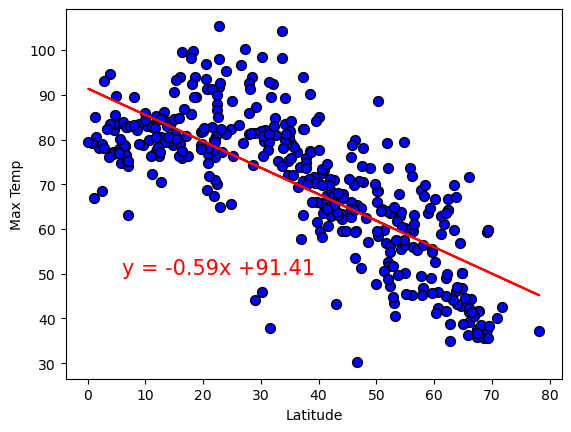

In [41]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,50), "blue")

The r-value is: 0.5575837249501988


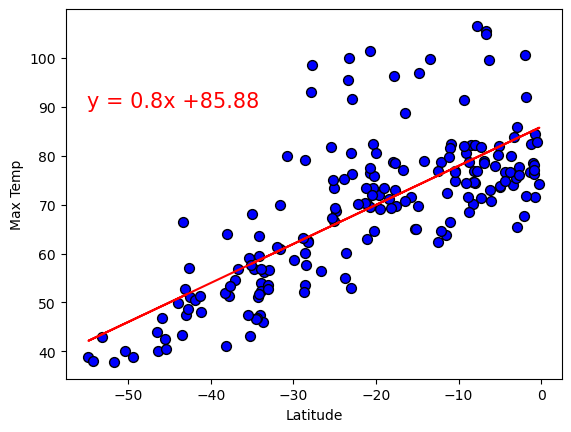

In [42]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55,90), "blue")

**Discussion about the linear relationship:** The high r value indicates a strong positive correlation between latitude and max temperature. R values ~0.5 indicate that there is a moderate positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.000883309455210583


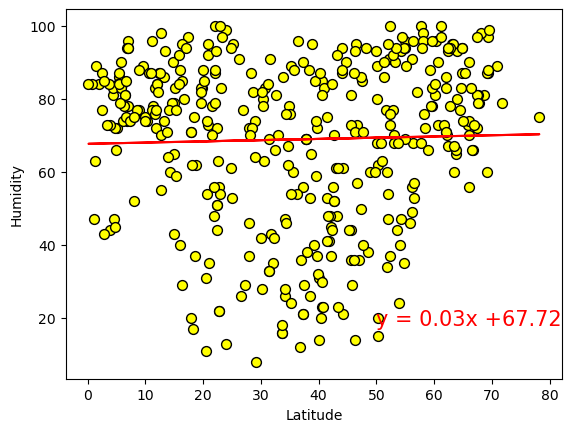

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (50,18), "yellow")

The r-value is: 1.5227158373691384e-05


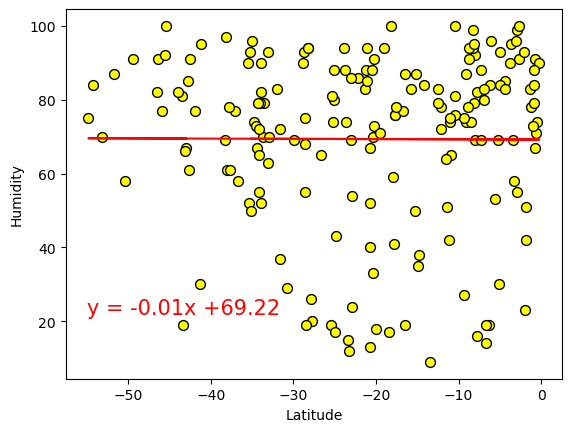

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-55,22), "yellow")

**Discussion about the linear relationship:** Our r value shows us there is weak to no relationship between latitude and humidity in the northern hemisphere. In the southern hemispere, there is a very strong relationship between latitude and humidity. This could be due to it being warmer there this time of year.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 1.3611516324664882e-08


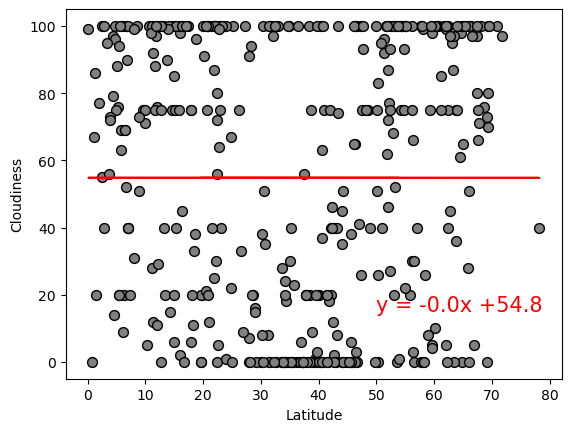

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (50,15), "gray")

The r-value is: 0.008712518958872848


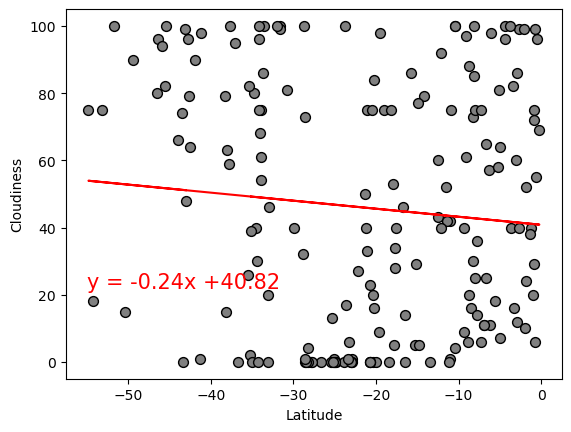

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55,22), "gray")

**Discussion about the linear relationship:** Our r value shows us there is a strong relationship between latitude and cloudiness in the northern hemisphere. In the southern hemispere, there is weak to no relationship between latitude and cloudiness. This could be due to it being warmer there this time of year.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0020203722921687066


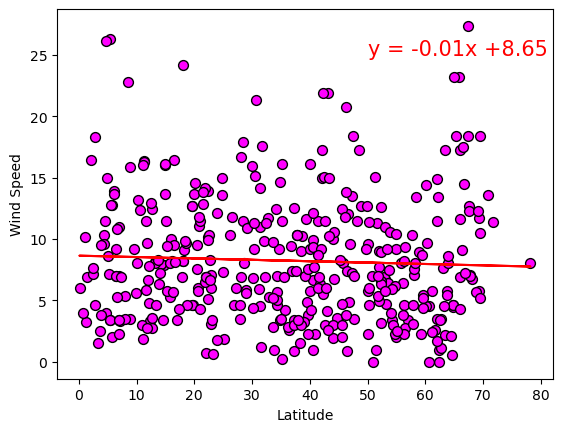

In [59]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (50,25), "magenta")

The r-value is: 0.030219565368190753


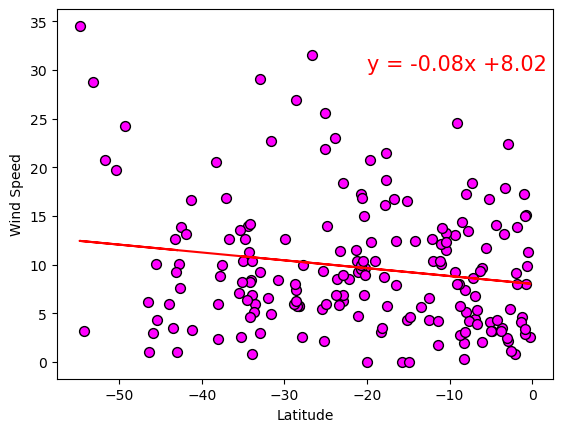

In [61]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-20,30), "magenta")

**Discussion about the linear relationship:** Our r value indicates there is little to no correlation between latitude and wind speed in either hemispere